In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [2]:
hotels_full = pd.read_csv('/Users/irak/Documents/GIS/LA_hotels/LOS_ANGELES_COUNTY_APARTMENT_AND_HOTEL_INSPECTIONS.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
hotels = hotels_full.drop(['PROGRAM ELEMENT', 'SERVICE CODE', 'SERIAL NUMBER', 'APN', 'STATE', 'RECORD ID'], axis=1)
hotels.head()

,ACTIVITY DATE,FACILITY ID,FACILITY NAME,PROGRAM IDENTIFIER,STATUS,PE DESCRIPTION,ADDRESS,CITY,ZIP,GIS LATITUDE,GIS LONGITUDE,SERVICE DESCRIPTION
0,06/01/2018,FA0172540,ORANGEBROOK MANOR,ORANGEBROOK MANOR,ACTIVE,MULTIPLE FAMILY DWELLING (101 + ) UNITS,5400 YARMOUTH AVE,ENCINO,91316,34.169040,-118.520140,COMPLAINT INVESTIGATION
1,06/01/2018,FA0254068,1714 N GARFIELD PL APTS,1714 N GARFIELD PL APTS,INACTIVE,MULTIPLE FAMILY DWELLING (11-20) UNITS,1714 N GARFIELD PL,LOS ANGELES,90028,34.102270,-118.310540,COMPLAINT INVESTIGATION
2,06/01/2018,FA0173466,1819 S GRAMERCY PL APTS,1819 S GRAMERCY PL APTS,ACTIVE,MULTIPLE FAMILY DWELLING (11-20) UNITS,1819 S GRAMERCY PL #303,LOS ANGELES,90019,34.041070,-118.313220,COMPLAINT INVESTIGATION
3,06/01/2018,FA0107297,11692 CHENAULT ST APTS,11692 CHENAULT ST APTS,INACTIVE,MULTIPLE FAMILY DWELLING (21-50) UNITS,11692 CHENAULT ST,LOS ANGELES,90049,34.056425,-118.467263,COMPLAINT INVESTIGATION
4,06/01/2018,FA0177960,1501 W ADAMS BLVD APTS,1501 W ADAMS BLVD APTS,ACTIVE,MULTIPLE FAMILY DWELLING (21-50) UNITS,1501 W ADAMS BLVD,LOS ANGELES,90007,34.032910,-118.294450,COMPLAINT INVESTIGATION


In [4]:
hotels['units_rooms'] = hotels['PE DESCRIPTION'].str.partition("(")[2]
hotels['units_rooms'] = hotels['units_rooms'].str.replace(')', '')

In [5]:
hotels['type'] = hotels['PE DESCRIPTION'].str.partition("(")[0]
hotels['type'] = hotels['type'].apply(lambda x: x.rstrip())

In [6]:
hotels['num_units'] = hotels['units_rooms'].str.partition(" ")[0]
hotels['num_units'] = hotels['num_units'].str.replace('101', '101+')
hotels['num_units'] = hotels['num_units'].str.replace('6-10', '5-10')

In [7]:
hotels_unique = hotels.groupby('FACILITY ID').first()
hotels_unique.head()

,ACTIVITY DATE,FACILITY NAME,PROGRAM IDENTIFIER,STATUS,PE DESCRIPTION,ADDRESS,CITY,ZIP,GIS LATITUDE,GIS LONGITUDE,SERVICE DESCRIPTION,units_rooms,type,num_units
FACILITY ID,,,,,,,,,,,,,,
FA0008357,06/06/2019,OXFORD HOTEL,CHANG DOWON,ACTIVE,HOTEL (51-100) ROOMS,745 S OXFORD AVE STE 201,LOS ANGELES,90005,34.058423,-118.308001,ROUTINE INSPECTION,51-100 ROOMS,HOTEL,51-100
FA0010226,02/05/2019,CRESCENT HOTEL,THE CRESCENT HOTEL,ACTIVE,HOTEL (21-50) ROOMS,403 N CRESCENT DR,BEVERLY HILLS,90210,34.071233,-118.400284,ROUTINE INSPECTION,21-50 ROOMS,HOTEL,21-50
FA0010357,07/11/2018,CULVER HOTEL,CULVER HOTEL,ACTIVE,HOTEL (21-50) ROOMS,9400 CULVER BLVD,CULVER CITY,90232,34.023862,-118.394158,ROUTINE INSPECTION,21-50 ROOMS,HOTEL,21-50
FA0012421,11/20/2018,CAMINO MOTEL,CAMINO MOTEL #2,ACTIVE,HOTEL (51-100) ROOMS,15601 CRENSHAW BLVD,GARDENA,90249,33.888877,-118.326765,ROUTINE INSPECTION,51-100 ROOMS,HOTEL,51-100
FA0014420,12/27/2018,FRIENDLY HILLS INN,FRIENDLY HILLS INN,ACTIVE,HOTEL (21-50) ROOMS,14329 WHITTIER BLVD,WHITTIER,90605,33.955642,-118.018454,ROUTINE INSPECTION,21-50 ROOMS,HOTEL,21-50


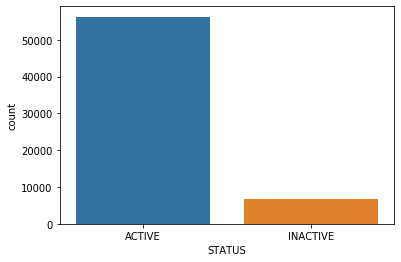

In [8]:
sns.countplot(data=hotels_unique, x='STATUS');

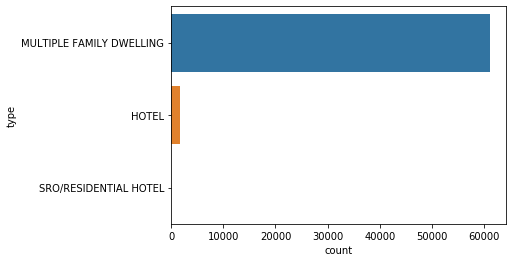

In [9]:
sns.countplot(data=hotels_unique, y='type', orient='h', order=hotels_unique['type'].value_counts().index);

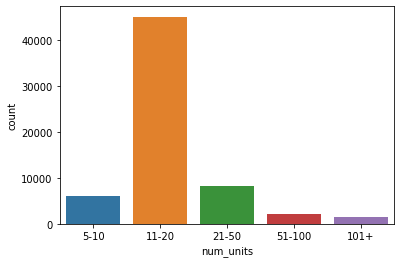

In [10]:
sns.countplot(data=hotels_unique, order=['5-10','11-20','21-50','51-100','101+'], x='num_units');

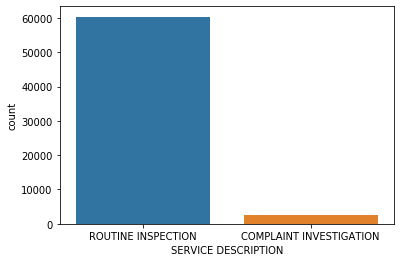

In [11]:
sns.countplot(data=hotels_unique, x='SERVICE DESCRIPTION')

In [12]:
geodf_hotels = gpd.GeoDataFrame(hotels_unique, geometry=gpd.points_from_xy(hotels_unique['GIS LONGITUDE'], hotels_unique['GIS LATITUDE']), crs="EPSG:4326") # объявляем геометрию
geodf_hotels = geodf_hotels.to_crs(epsg=32611) # меняем crs на нужную

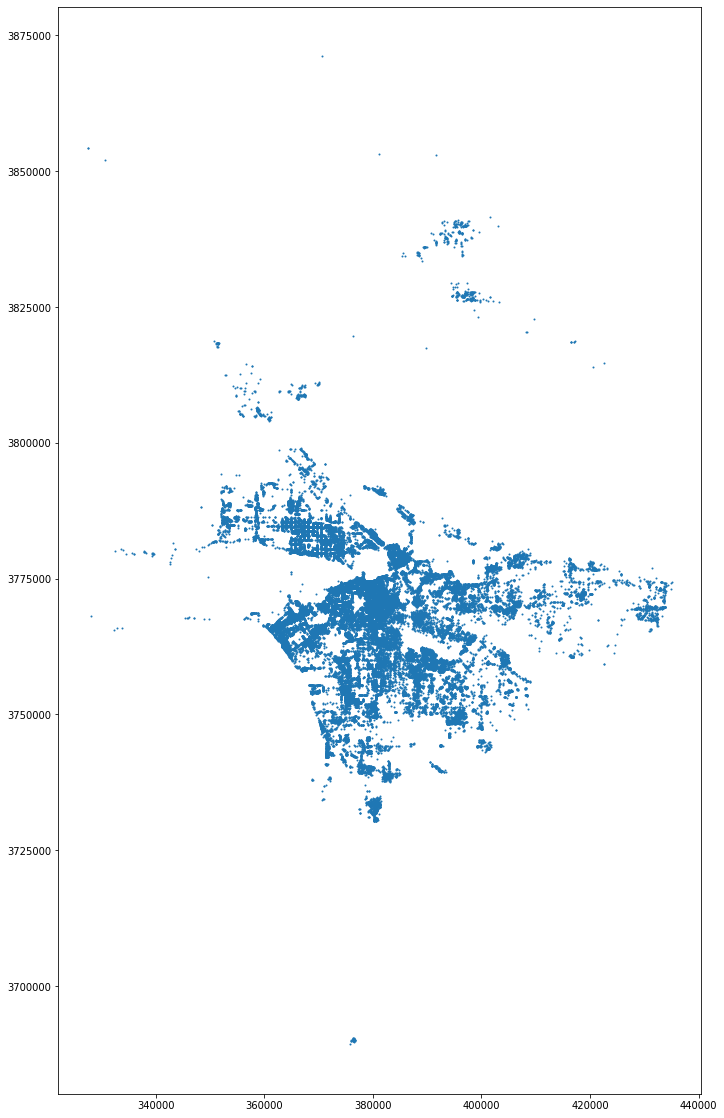

In [13]:
geodf_hotels.plot(figsize=(20, 20), markersize=1)

In [14]:
neigh = gpd.read_file('/Users/irak/Documents/LA_proj/la-county-neighborhoods-current/')

In [15]:
neigh_proj = neigh.to_crs(epsg=32611)

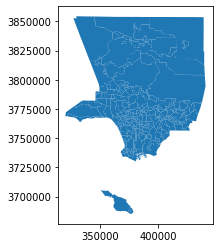

In [16]:
neigh_proj.plot()

In [17]:
neigh_proj['city_low'] = neigh_proj['name'].str.lower()
hotels_unique['city_low'] = hotels_unique['CITY'].str.lower()

In [18]:
ndf = hotels_unique['city_low'].value_counts()
hotels_by_city = pd.DataFrame(columns=['city_low', 'hotels_count'])
hotels_by_city['city_low'] = ndf.index
hotels_by_city['hotels_count'] = ndf.values
hotels_by_city.head()

,city_low,hotels_count
0,los angeles,25563
1,glendale,2764
2,santa monica,2384
3,north hollywood,2109
4,van nuys,1827


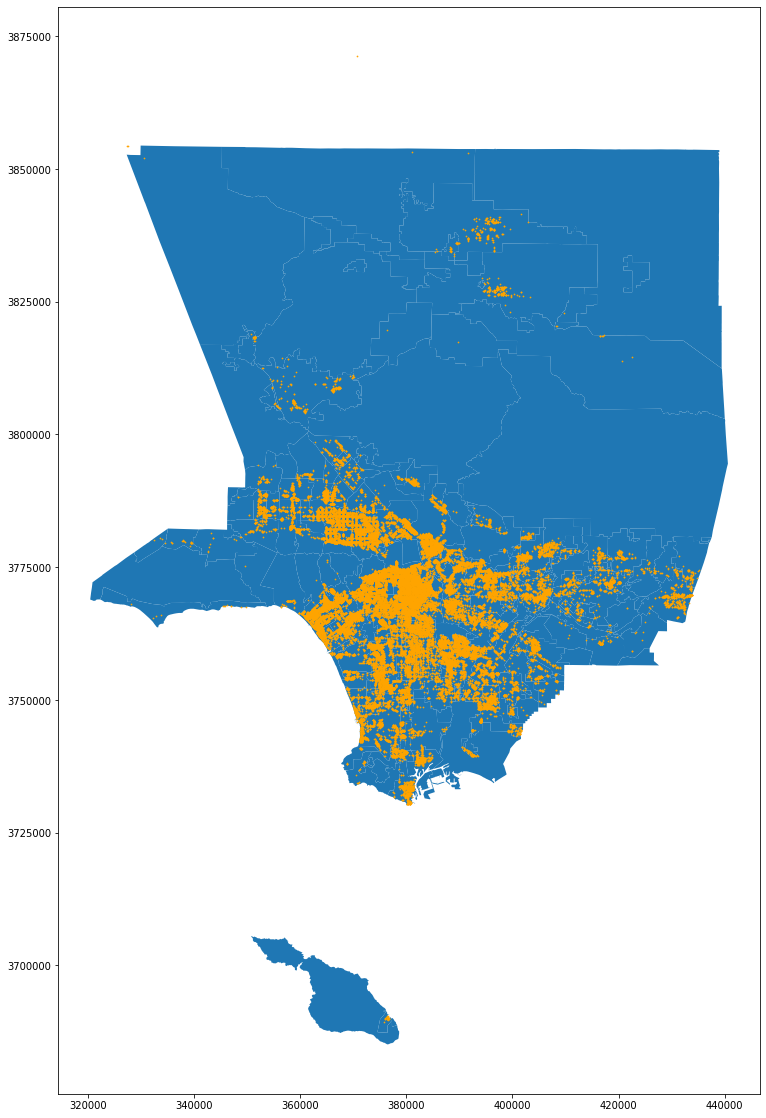

In [25]:
ax = neigh_proj.plot(figsize=(20, 20))
geodf_hotels.plot(ax=ax, color='orange', markersize=0.5)

In [53]:
# названия не сходятся, поэтому пришлось идти от геометрии
pip = gpd.sjoin(geodf_hotels, neigh_proj, how="right", op='within')
pip['hotels_count'] = 1
pip = pip.groupby('name').agg({'sqmi':'first', 'hotels_count':'sum'}).reset_index()

In [54]:
neigh_hotels = neigh_proj.merge(pip, on='name', how='left')
neigh_hotels = neigh_hotels.drop(['name_1', 'slug_1'], axis=1)
neigh_hotels['hotels_full'] = neigh_hotels['hotels_count'].fillna(0)

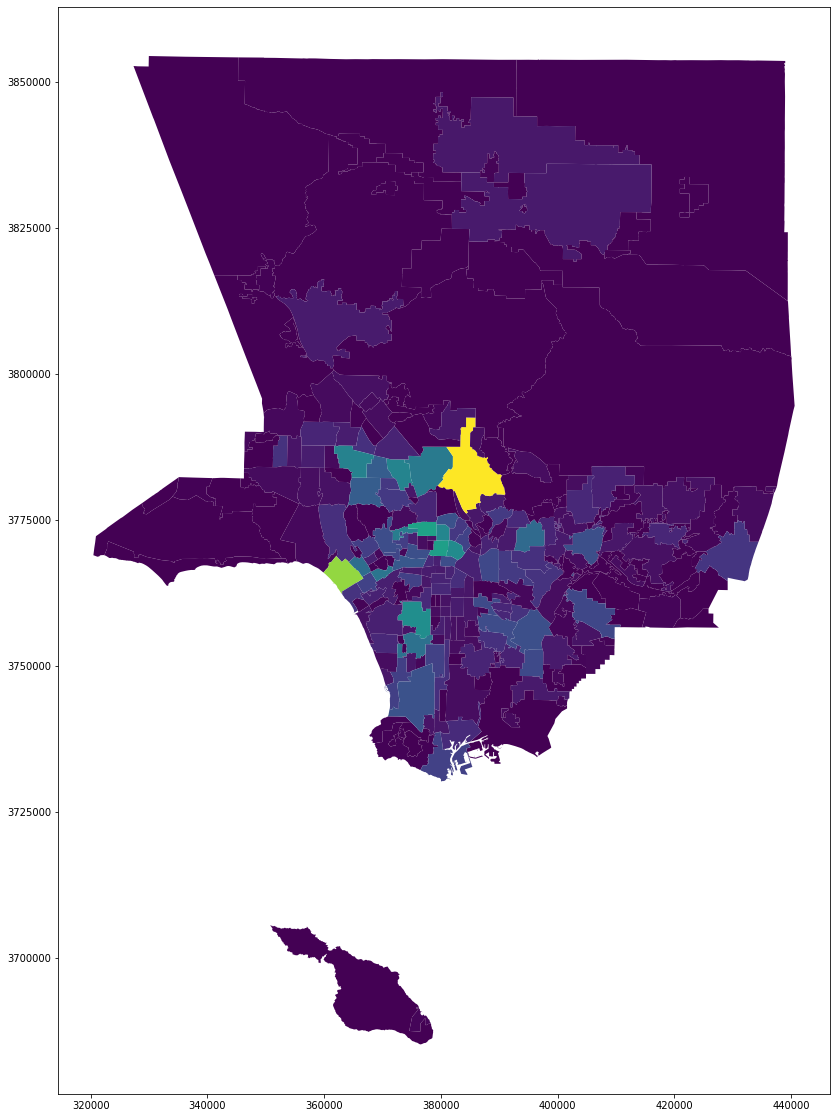

In [55]:
neigh_hotels.plot(column='hotels_full', figsize=(20, 20))

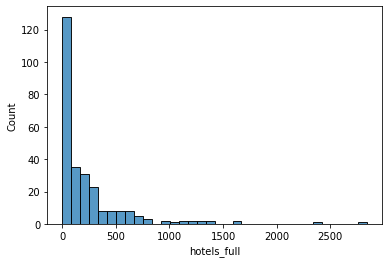

In [56]:
sns.histplot(data=neigh_hotels, x='hotels_full');

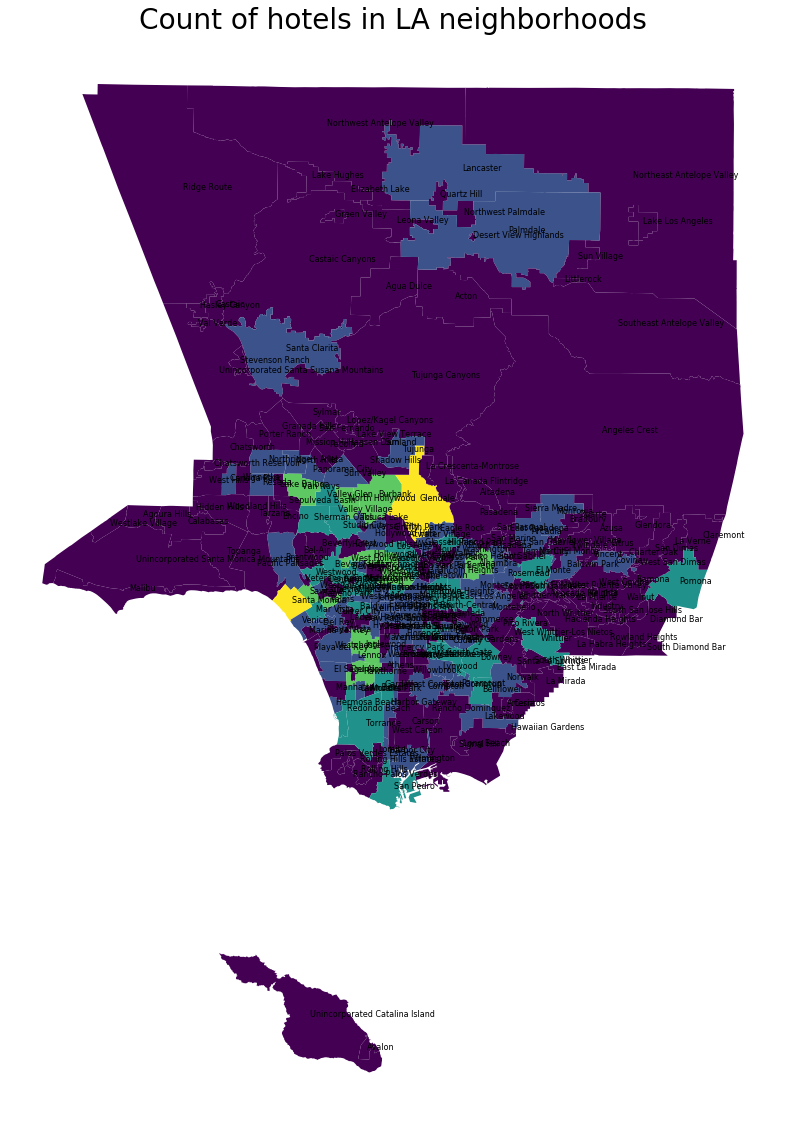

In [72]:
ax = neigh_hotels.plot(column='hotels_full', figsize=(20, 20), scheme='natural_breaks', k=5)
ax.axis('off')
plt.title('Count of hotels in LA neighborhoods', size=28)

# points
neigh_hotels["center"] = neigh_hotels.geometry.centroid
neigh_hotels_points = neigh_hotels.copy()
neigh_hotels_points.set_geometry("center", inplace = True)

# point labels
texts = []
for x, y, label in zip(neigh_hotels_points.geometry.x, neigh_hotels_points.geometry.y, neigh_hotels_points["name"]):
    texts.append(plt.text(x, y, label, fontsize = 8))